In [20]:
import math
import pandas as pd
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

In [22]:
file_name = '/content/SAheart.data'
data = pd.read_csv(file_name, sep=',', index_col=0)

In [23]:
data['famhist'] = data['famhist'] == 'Present'
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,True,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,False,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,True,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,True,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,True,60,25.99,57.34,49,1


In [24]:
n_test = int(math.ceil(len(data) * 0.3))
random.seed(42)
test_ixs = random.sample(list(range(len(data))), n_test)
train_ixs = [ix for ix in range(len(data)) if ix not in test_ixs]
train = data.iloc[train_ixs, :]
test = data.iloc[test_ixs, :]
print(len(train))
print(len(test))

323
139


In [25]:
#features = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']
features = ['adiposity', 'age']
response = 'chd'
x_train = train[features]
y_train = train[response]
x_test = test[features]
y_test = test[response]

In [26]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

In [27]:
hidden_units = 10     # how many neurons in the hidden layer
activation = 'relu'   # activation function for hidden layer
l2 = 0.01             # regularization - how much we penalize large parameter values
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 5            # how many epochs to train for
batch_size = 16   

In [28]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
21/21 [==============================] - 0s 5ms/step - loss: 0.6191 - accuracy: 0.6718
Epoch 2/20
21/21 [==============================] - 0s 5ms/step - loss: 0.6159 - accuracy: 0.6718
Epoch 3/20
21/21 [==============================] - 0s 5ms/step - loss: 0.6176 - accuracy: 0.6718
Epoch 4/20
21/21 [==============================] - 0s 6ms/step - loss: 0.6253 - accuracy: 0.6656
Epoch 5/20
21/21 [==============================] - 0s 3ms/step - loss: 0.6155 - accuracy: 0.6718
Epoch 6/20
21/21 [==============================] - 0s 3ms/step - loss: 0.6146 - accuracy: 0.6687
Epoch 7/20
21/21 [==============================] - 0s 3ms/step - loss: 0.6162 - accuracy: 0.6718
Epoch 8/20
21/21 [==============================] - 0s 4ms/step - loss: 0.6135 - accuracy: 0.6749
Epoch 9/20
21/21 [==============================] - 0s 4ms/step - loss: 0.6130 - accuracy: 0.6687
Epoch 10/20
21/21 [==============================] - 0s 4ms/step - loss: 0.6153 - accuracy: 0.6687
Epoch 11/20
21/21 [

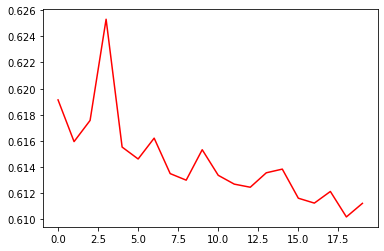

In [31]:
# train the parameters
history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

### RUN IT AGAIN! ###

In [32]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

9/9 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6115

Test accuracy: 61.2%
